In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\dailysales.csv', parse_dates=['date'])
df.head()

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


<AxesSubplot:>

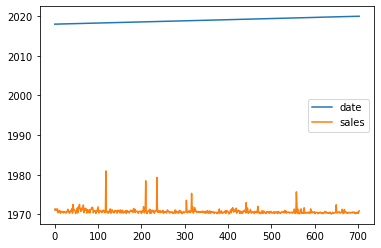

In [3]:
df.plot()

Resampling the data

In [4]:
df = df.groupby("date").sum()
df.head(10)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


!['resample'](images/resample.jpg)

In [5]:
df = df.resample(rule="MS").sum()

<AxesSubplot:xlabel='date'>

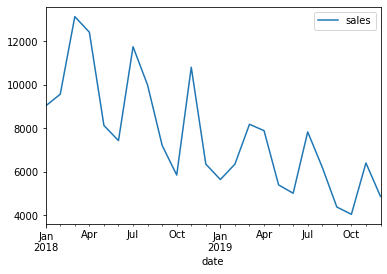

In [6]:
df.plot()

In [7]:
import statsmodels.api as sm

C:\Users\NEVISH~1\AppData\Local\Temp/ipykernel_17608/627103843.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(df,model='additive', freq=4)


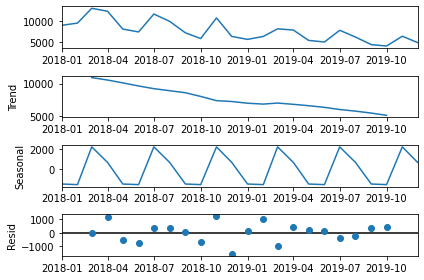

In [8]:
decomposition = sm.tsa.seasonal_decompose(df,model='additive', freq=4)
fig = decomposition.plot()
plt.show()

In [9]:
train = df[:19]
test = df[19:]

**Holt Winters Model**

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
# seasonal_periods is 4 as seasonality is quaterly
hwmodel = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=4).fit()

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [12]:
pred = hwmodel.forecast(5) # Predict next 5 points (months)

<AxesSubplot:xlabel='date'>

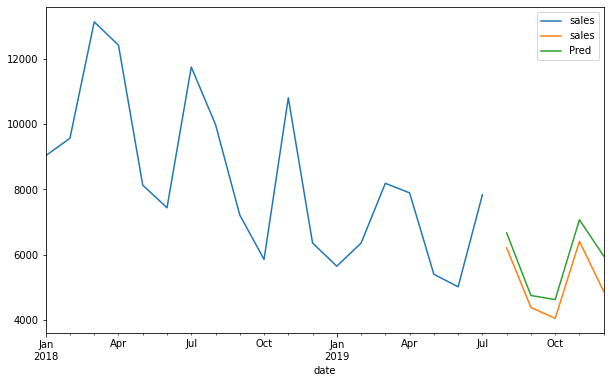

In [13]:
ax = train.plot(legend=True, label="Train", figsize=(10,6))
test.plot(legend=True, label="Test", figsize=(10,6), ax=ax)
pred.plot(legend=True, label="Pred", figsize=(10,6), ax=ax)

**Model Evaluation**

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
error = np.sqrt(mean_squared_error(test, pred))
error

678.3799719818626

In [16]:
(df.sales.mean(), np.sqrt(df.sales.var()))

(7665.204166666666, 2549.757117414906)

In [17]:
df.describe() 

,sales
count,24.000000
mean,7665.204167
std,2549.757117
min,4043.450000
25%,5800.087500
50%,7326.500000
75%,9169.000000
max,13143.000000


**Full Dataset- - Future Predictions**

In [18]:
# seasonal_periods is 4 as seasonality is quaterly
hwmodel_future = ExponentialSmoothing(df, trend='add', seasonal='mul', seasonal_periods=4).fit()
future_pred = hwmodel_future.forecast(4)

C:\Users\nevishwakarma\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='date'>

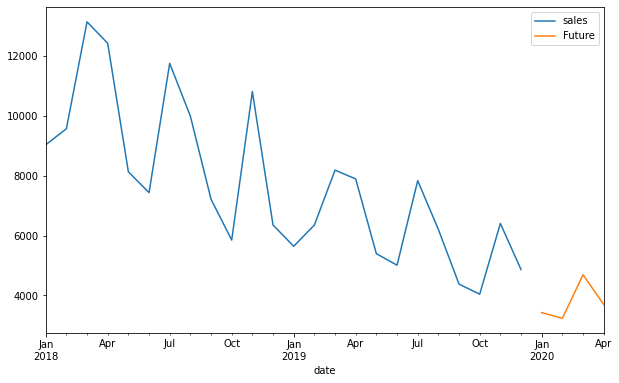

In [19]:
df.plot(legend=True, label="Sales", figsize=(10,6))
future_pred.plot(legend=True, label="Future")